TypeError: float() argument must be a string or a number, not 'set'

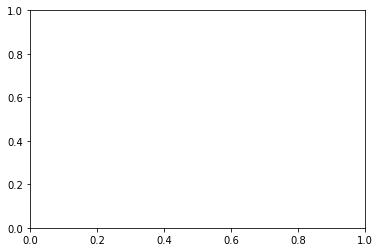

In [73]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.

import random
import pandas as pd
import matplotlib.pyplot as plt


# The only missing method is the portal where we can get the data

def getDataset():
    data = pd.read_csv("mushroom-attributions-200-samples.csv")
    data = data[['odor', 'bruises']]  # Reduce dims of dataset in order to visualize
    dataset = []
    for i in range(50):
        dataset.append(data.loc[i])
    return dataset


# data: the actual data we use for this algorithm, it is a collection of data points, each point has dimension dims
def computeDistance(i, j, data):
    dims = len(data[0])
    dis = 0
    for x in range(dims):
        dis += (data[i][x] - data[j][x]) ** 2
    return dis ** .5


def buildRankTable(data):
    n = len(data)
    rank = [[(0, 0) for i in range(n)] for j in range(n)]
    similarityMetrix = [[(0, 0) for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(i, n):
            d = computeDistance(i, j, data)
            rank[i][j] = (d, j)
            rank[j][i] = (d, i)
    for i in range(n):
        rank[i].sort(key=lambda x: x[0])
        r = 0
        rankings = []
        for j in range(n):
            rankings.append(r)
            if j <= n - 2 and rank[i][j][0] == rank[i][j + 1][0]:
                r -= 1
            r += 1
            similarityMetrix[i][j] = rank[i][j][1]
            rank[i][j] = rank[i][j][1]

        newList = [0] * n
        for j in range(n):
            newList[rank[i][j]] = rankings[j]

        rank[i] = newList
    return rank, similarityMetrix


# tableS: a nxn matrix containing all Sij values
# setG: set of integers - indexes of data points
def getHv(index, n, rankTable, setG):
    m = len(setG)
    hv = m * (m + 1) / 2
    for j in range(n):
        if not j in setG:
            for r in rankTable[index]:
                if r < rankTable[index][j]:
                    hv += 1
    return hv


def randomMedoids(k, data):
    medoids = []
    for i in range(k):
        medoids.append(random.randint(0, len(data)))
    return medoids


def assignToGroups(m, medoids, rankTable, similarityMetrix):
    groups = []  # list of Set
    for medoid in medoids:
        group = set(similarityMetrix[medoid][:m])
        groups.append(group)
    return groups


def printNice(table):
    for i in table:
        print(i)


def drawTwoDims(groups):
    plt.plot(groups)




if __name__ == '__main__':
    data = getDataset()
    n = len(data)
    numOfLoops = 1000
    k = 5
    m = 20
    medoids = randomMedoids(k, data)
    rankTable, similarityMetrix = buildRankTable(data)
    for i in range(numOfLoops):
        groups = assignToGroups(m, medoids, rankTable, similarityMetrix)
        newMedoids = []
        for group in groups:

            # The first position stores the new medoid, the second stores the maximum hv value
            maxHv = (-1, -1)
            for point in group:
                hv = getHv(point, n, rankTable, group)
                if hv > maxHv[1]:
                    maxHv = (point, hv)
            newMedoids.append(maxHv[0])
        medoids = newMedoids
    # Output: Groups!
    drawTwoDims(groups)


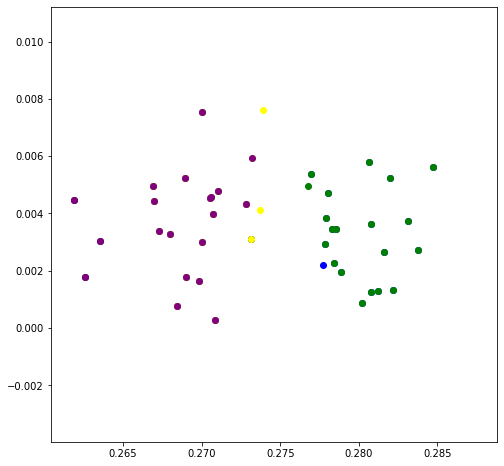

In [80]:
colors = ['blue','black','yellow','green','purple']
m = 0
plt.figure(figsize=(8,8))

for g in groups:
    for i in g:
        x = data[i][0]
        y = data[i][1]
        plt.scatter(x,y, color = colors[m])
    m+=1

plt.show()
